In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer
from tqdm import tqdm


# 📌 Configurar gráficos en Jupyter Notebook
%matplotlib inline
sns.set(style="whitegrid")

c:\Users\migui\anaconda3\envs\TFG\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# 📌 Cargar dataset ya clasificado
data = pd.read_csv('cleaned_clasified_Dota2_chats.csv')

# 📌 Seleccionar columnas relevantes
data = data[['match', 'time', 'slot', 'text_en', 'predicted_label']]

# 📌 Verificar datos cargados
print("Primeras filas del dataset:")
display(data.head())

# 📌 Ver distribución de categorías
print("\nDistribución de clases en el dataset:")
display(data['predicted_label'].value_counts())


Primeras filas del dataset:


,match,time,slot,text_en,predicted_label
0,954334,-26.06113,7,fist item,coordination
1,756982,85.44562,9,new meta,coordination
2,925441,2173.20525,5,weve got kerry gg,chitchat
3,946663,1507.19866,6,fuck its a point,toxic_offense
4,244781,1298.58290,0,dont be so nervous lion,coordination



Distribución de clases en el dataset:


predicted_label
chitchat                 29865
coordination             25082
toxic_offense            16627
gender_discrimination      895
racism                     776
religious_intolerance      331
Name: count, dtype: int64

In [12]:
# 📌 Cargar modelo de embeddings (requiere conexión a internet la primera vez)
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# 📌 Convertir texto a embeddings
print("Generando embeddings para los mensajes...")
X_embeddings = embedding_model.encode(data['text_en'].tolist(), show_progress_bar=True)

# 📌 Guardar embeddings en un array de NumPy
X = np.array(X_embeddings)
y = data['predicted_label']

print("Embeddings generados con éxito!")


c:\Users\migui\anaconda3\envs\TFG\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\migui\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Generando embeddings para los mensajes...


Batches: 100%|██████████| 2300/2300 [00:13<00:00, 164.97it/s]


Embeddings generados con éxito!


In [13]:
# 📌 Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 Mostrar tamaños de los conjuntos
print(f"Tamaño de entrenamiento: {len(X_train)}")
print(f"Tamaño de prueba: {len(X_test)}")


Tamaño de entrenamiento: 58860
Tamaño de prueba: 14716


In [14]:
# 📌 Inicializar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=5, random_state=42)

# 📌 Entrenar modelo
print("Entrenando modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("Entrenamiento completado!")


Entrenando modelo Random Forest...
Entrenamiento completado!



✅ Precisión del modelo: 0.7221

📌 Reporte de Clasificación:
                       precision    recall  f1-score   support

             chitchat       0.71      0.82      0.76      5973
         coordination       0.67      0.78      0.72      5017
gender_discrimination       1.00      0.22      0.36       179
               racism       0.85      0.07      0.13       155
religious_intolerance       1.00      0.09      0.17        66
        toxic_offense       0.89      0.53      0.66      3326

             accuracy                           0.72     14716
            macro avg       0.85      0.42      0.47     14716
         weighted avg       0.75      0.72      0.71     14716



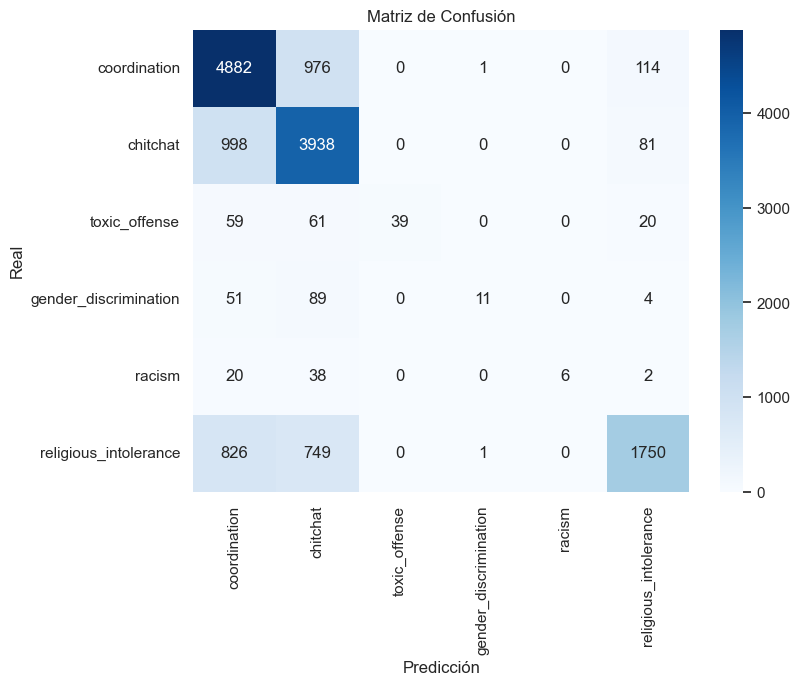

In [15]:
# 📌 Hacer predicciones
y_pred = rf_model.predict(X_test)

# 📌 Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Precisión del modelo: {accuracy:.4f}")

# 📌 Mostrar reporte de clasificación
print("\n📌 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 📌 Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
